In [1]:
# import tensorflow as tf
# from tensorflow.keras import layers
# import numpy as np

# Auto MPG with Regression

In [2]:
# import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# dataset_path

32768/30286 [================================] - 0s 5us/step


In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# df

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [7]:
df = pd.get_dummies(df, columns=['Origin'])   # one-hot encoding
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['MPG'],axis=1),df['MPG'], test_size=0.2)

In [9]:
# from tensorflow.keras.layers.experimental.preprocessing import Normalization
# normalizer = Normalization(axis=-1)
# normalizer.adapt(x_train.values)
# def norm(x):
#   train_stats = x.describe().T
#   return (x - train_stats['mean']) / train_stats['std']
# x_train = norm(x_train)
# x_test = norm(x_test)
# from sklearn.preprocessing import normalize
# # sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)
# x_train = normalize(x_train)
# x_test = normalize(x_test)
# x_train = normalize(x_train, norm='l1', axis=1)
# x_test = normalize(x_test, norm='l1', axis=1)

In [10]:
def build_model(input_shape):
  model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model(x_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [12]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
EPOCHS = 1000
history = model.fit(x_train, y_train, epochs=1000, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [13]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
995,6.811519,1.958541,6.811519,9.840247,2.162173,9.840247
996,14.201476,2.982246,14.201476,10.479305,2.274162,10.479305
997,7.749663,2.169424,7.749663,10.940017,2.314486,10.940017
998,10.146712,2.480995,10.146712,11.734316,2.522594,11.734316
999,8.898647,2.363364,8.898647,9.511866,2.267997,9.511866


In [18]:
!python3 -m pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/97/tlrcz11d2xbdrgw8cqk5c37w0000gn/T/pip-req-build-94twz4ya
     |████████████████████████████████| 1.0 MB 2.2 MB/s eta 0:00:01
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.07709fc2909067eb0f213c262669e4c54299ff5d4_-py3-none-any.whl size=146477 sha256=4bc43926f5962848b5c253e9ea362990d2d28b4951f2f33317a385424be7ee63
  Stored in directory: /private/var/folders/97/tlrcz11d2xbdrgw8cqk5c37w0000gn/T/pip-ephem-wheel-cache-vh7lkw23/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.13.0
    Uninstalling protobuf-3.13.0:
      Successfully uninstalled protobuf-3.13.0


In [20]:
# import tensorflow_docs as tfdocs
import tensorflow_docs.plots
# import tensorflow_docs.modeling
plotter = tensorflow_docs.plots.HistoryPlotter(smoothing_std=2)

In [21]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

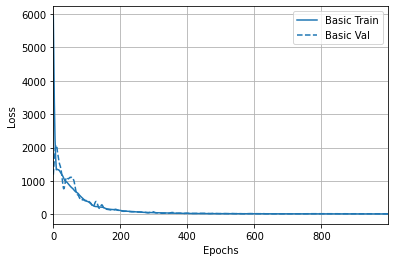

In [22]:
plotter.plot({'Basic': history}, metric = "loss")
# plt.ylim([0, 10])
# plt.ylabel('loss')

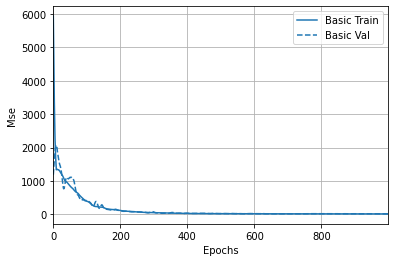

In [23]:
plotter.plot({'Basic': history}, metric = "mse")
# plt.ylim([0, 20])
# plt.ylabel('MSE [MPG^2]')

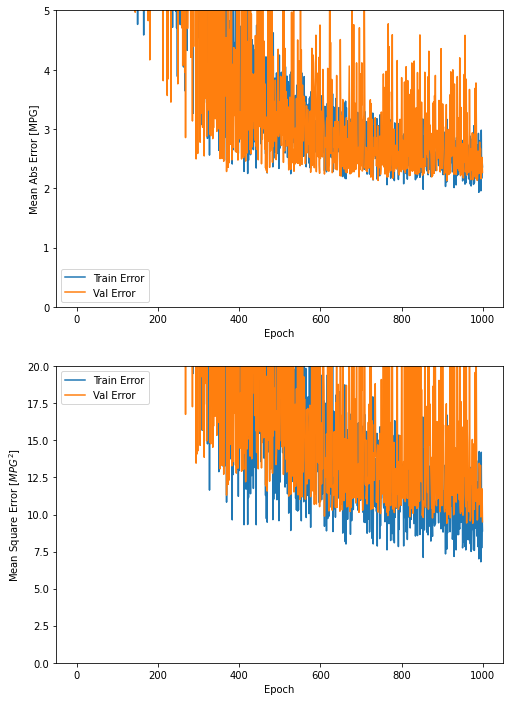

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................

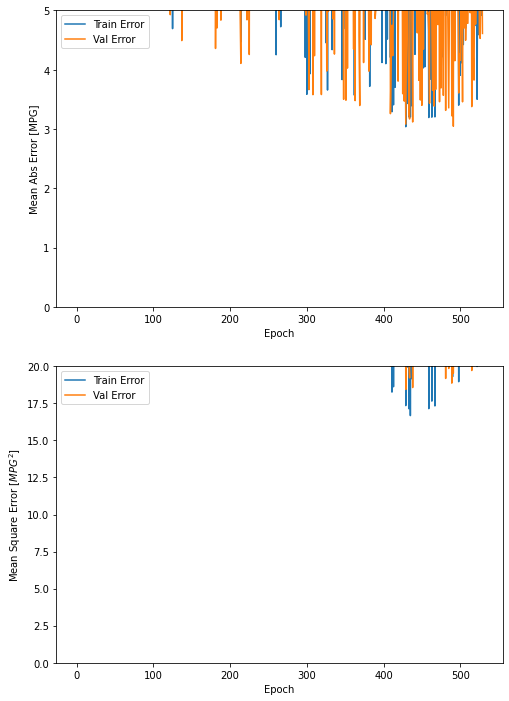

In [25]:
model = build_model(x_train.shape[1])

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

Text(0, 0.5, 'MAE [MPG]')

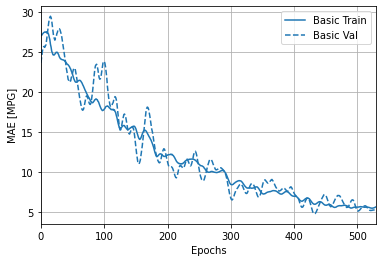

In [26]:
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

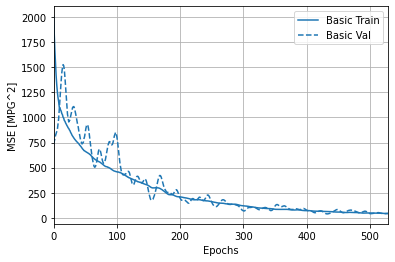

In [27]:
plotter.plot({'Basic': history}, metric = "mse")
# plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')